In [9]:
from dotenv import load_dotenv
load_dotenv()

True

# **Basicos para empezar**

Es bueno antes de empezar a hablar de langgraph tener en cuenta estos conceptos ya que a la hora de diseñar ciertas funciones o functions calls van a ser utiles estos conceptos por que es importante repasarlos antes de ...

## **Typing**

Esto es importante por nos permite observar como tiparemos los tools a futuro para que nuestros agentes lo usen de manera correcta


### Diccionarios!

In [4]:
from typing import TypedDict

class Movie(TypedDict):
    name: str
    year: int

movie = Movie(name="Avengers Endgame", year=2019)

### Union

In [7]:
from typing import Union

def square(x: Union[int, float]) -> float:
    return x * x

x = 5          # ✅ esto está bien porque es un entero
x = 1.234      # ✅ esto también está bien porque es un flotante
x = "I am a string!"  # ❌ esto fallará porque es una cadena

### Any


In [6]:
from typing import Any

def print_something(something: Any):
    print(something)

# Esto es valido porque Any es un tipo que puede ser cualquier cosa
print_something("Hello, world!")
print_something(123)
print_something(True)
print_something(None)
print_something([1, 2, 3])
print_something({"name": "John", "age": 30})

Hello, world!
123
True
None
[1, 2, 3]
{'name': 'John', 'age': 30}


### Optional

In [8]:
from typing import Optional

def nice_message(name: Optional[str]) -> str:
    if name is None:
        return "Hello, world!"
    else:
        return f"Hello, {name}!"

# Esto es valido porque Optional[str] es un tipo que puede ser None o str
print(nice_message("John"))
print(nice_message(None))

Hello, John!
Hello, world!


## **Lambdas**

 Funciones simples que permiten escribir logica sin necesidad de mucha sintaxis


In [3]:
# Definir una función lambda para calcular el cuadrado
square = lambda x: x * x

# Usar la función lambda
print(square(10))  # Salida: 100

# Aplicar una función lambda a una lista usando map
nums = [1, 2, 3, 4]
squares = list(map(lambda x: x * x, nums))

print(squares)  # Salida: [1, 4, 9, 16]

100
[1, 4, 9, 16]


# **LangGraph**

Langgraph es una libreria de los mismos creadores de langchain la cual nos permite crear flujos complejos a partir de un estructura jerarquica muy parecida a un grafo usando modelos de inteligencia artificial en cada nodo, esta libreria tiene varios componentes base que permiten construir esto flujos los cuales son:

- **State**: Este simplemente es el contexto que tendra el grafo en X tiempo de toda la aplicación, en pocas palabras es una memoria que puede ser modifica durante tiempo de ejecución.
- **Nodes**: Estos vienen siendo las diferentes funciones o operaciones que ejecutan las diferentes tareas del grafo, cada uno de estos nodos juega con el estado y el input del usuario para procesarlos y asi generar una respuesta.
- **Grafo**: Este es el flujo final que tomara el input del usuario para ser procesado y asi poder ejecutar las tareas para generar la respuesta deseada.
- **Caminos**: Estas son las conexiones que se hacen entre nodos y describen los diferentes caminos que se pueden tomar en el grafo para procesar la información.
- **Caminos** condicionales: Son caminos en el nodo los cuales se ejecutan bajo ciertas condiciones y tienen dos o mas posibilidades.
- **INICIO**: es donde inicia todo el flujo del grafo y ademas describe el la entrada del usuario
- **FIN**: describe el fin del flujo del grafo y la respuesta generada por el flujo descrito.
- **Tools**: Herramientas que usaran los agentes para llevar a cabo tareas con plataformas externas al grafo.
- **ToolNode**: Es un tipo de nodo que internamente ya maneja la logica para llamar los tools cuando sea necesario.
- **StateGraph**: Estado abstracto minimo que deberia tener todo grafo para funcionar, no es obligatorio.
- **Message**: Describen los diferentes tipos de mensajes que puede llegar a usar entre ellos: Tool, User, Ai, System y Function  

### Hola mundo



In [11]:
from typing import TypedDict

from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    message: str

def greatings(state: AgentState) -> AgentState:
    state["message"] = f"Hello, {state['message']}!"
    return state


graph = StateGraph(AgentState)

graph.add_node("greatings", greatings)
graph.add_edge(START, "greatings")
graph.add_edge("greatings", END)

workflow = graph.compile()

workflow.invoke({"message": "Andrés"})

{'message': 'Hello, Andrés!'}

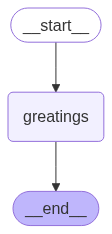

In [12]:
from IPython.display import Image, display


display(Image(workflow.get_graph().draw_mermaid_png()))

### Ejercicio extender "Hola mundo"


In [16]:
from typing import TypedDict

from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    messages: list[str]
    name: str

def say_hi(state: AgentState) -> AgentState:
    if state["name"] is None:
        state["messages"].append("Hola, ¿cómo te llamas?")
    else:
        state["messages"].append(f"Hola, {state['name']}!")
    return state


graph_builder = StateGraph(AgentState)

graph_builder.add_node("say_hi", say_hi)
graph_builder.add_edge(START, "say_hi")
graph_builder.add_edge("say_hi", END)

workflow_v2 = graph_builder.compile()

result = workflow_v2.invoke({"messages": ["Que ondita?"], "name": None})
print(result)

result = workflow_v2.invoke({"messages": ["Que ondita?"], "name": "Andrés"})
print(result)

{'messages': ['Que ondita?', 'Hola, ¿cómo te llamas?'], 'name': None}
{'messages': ['Que ondita?', 'Hola, Andrés!'], 'name': 'Andrés'}


### Varias entradas

In [18]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List


class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [19]:
def process_values(state: AgentState) -> AgentState:
    """This function process values"""
    state["result"] = f"Hi, {state['name']}! The sum of your values is {sum(state['values'])}"
    return state

In [20]:
workflow = StateGraph(AgentState)

workflow.add_node("process_values", process_values)
workflow.add_edge(START, "process_values")
workflow.add_edge("process_values", END)

app = workflow.compile()

app.invoke({"values": [1, 2, 3], "name": "Andrés"})

{'values': [1, 2, 3],
 'name': 'Andrés',
 'result': 'Hi, Andrés! The sum of your values is 6'}

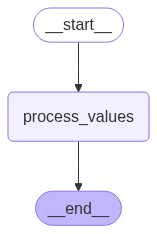

In [21]:
from IPython.display import Image, display


display(Image(app.get_graph().draw_mermaid_png()))